In [1]:
import os
import re
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
os.chdir(project_root)

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics as skmetrics
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import fontManager
from IPython.display import display
from ipywidgets import interact, FloatSlider
from umap import UMAP


sns.set_theme(style="ticks", palette="tab10")
# sns.set_theme(style="white")
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 10  
plt.rcParams['axes.labelsize'] = 12  
plt.rcParams['axes.titlesize'] = 14  
plt.rcParams['xtick.labelsize'] = 10  
plt.rcParams['ytick.labelsize'] = 10 

os.makedirs('out/figs', exist_ok=True)

cv 60349
ebrains 8612
Start projection
Done projection


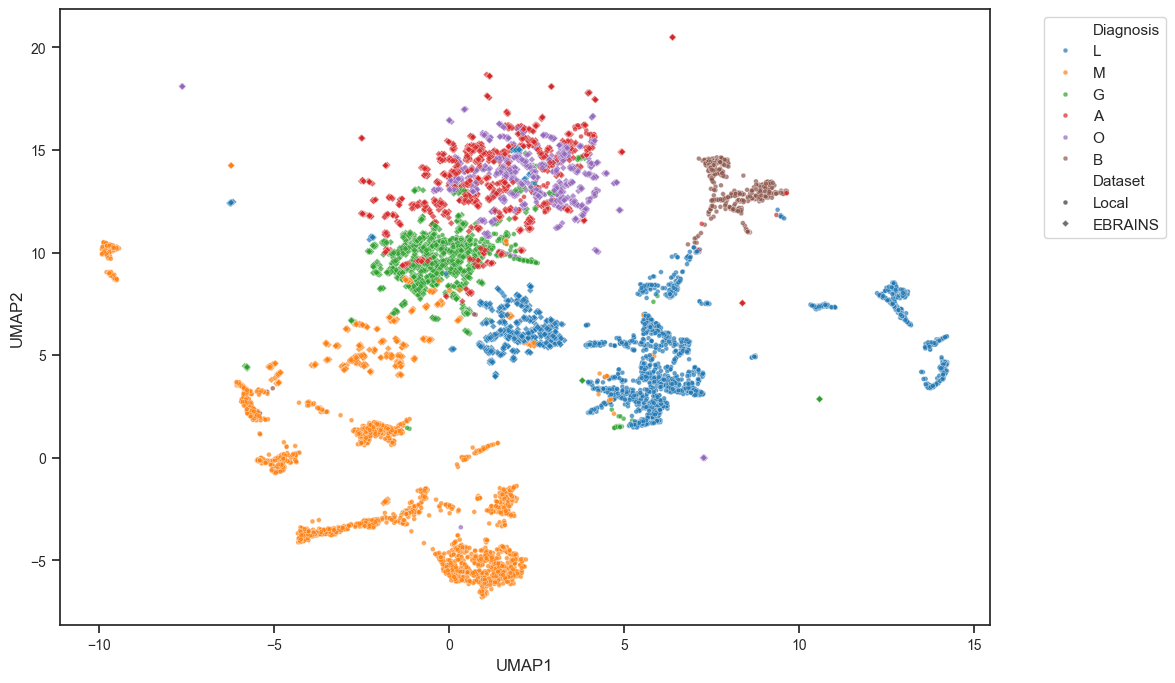

In [2]:
def cluster(cv_pt=None, 
            ebrains_pt=None,
            cv_count_per_case = 20,
            ebrains_count_per_case = -1,
            n_neighbors = 40,
            min_dist = 0.2,
            show = True,
           ):
    if cv_pt is None and ebrains_pt is None:
        raise RuntimeError('At least cv or ebrains must be provided.')

    if ebrains_count_per_case < 0:
        ebrains_count_per_case = cv_count_per_case // 2

    cols = ['name', 'diag_org', 'pred', 'feature']
    
    df = pd.DataFrame([])
    if cv_pt:
        df = pd.DataFrame(torch.load(cv_pt))[cols]
        df['Dataset'] = 'Local'
        print('cv', len(df))

    if ebrains_pt:
        df_ebrains = pd.DataFrame(torch.load(ebrains_pt))[cols]
        df_ebrains['Dataset'] = 'EBRAINS'
        print('ebrains', len(df_ebrains))
        df = pd.concat([df_ebrains, df])

    unique_codes = df['diag_org'].unique()
    
    rowss = []
    for name, _rows in df.groupby('name'):
        count = cv_count_per_case if _rows.iloc[0]['Dataset'] == 'Local' else ebrains_count_per_case
        rows = df.loc[np.random.choice(_rows.index, count)]
        rowss.append(rows)
    df = pd.concat(rowss)

    # df_cv = df[df['Dataset'] == 'Local']
    # print(df_cv)
    # df_ebrains = df[df['Dataset'] == 'EBRAINS']
    # print(df_ebrains)

    features = np.stack(df['feature'])
    umap_model = UMAP(
       n_neighbors=n_neighbors,
       min_dist=min_dist,
    )
    print('Start projection')
    embedding = umap_model.fit_transform(features)
    print('Done projection')
    df['UMAP1'] = embedding[:, 0]
    df['UMAP2'] = embedding[:, 1]
    df = df.rename(columns={'diag_org': 'Diagnosis'})
    
    plt.figure(figsize=(12, 8))
    # scatter_cv = sns.scatterplot(
    #     data=df_cv, x='UMAP1', y='UMAP2',
    #     hue='Diagnosis', hue_order=unique_codes,
    #     palette='tab10', s=7)
    # scatter_ebreains = sns.scatterplot(
    #     data=df_ebrains, x='UMAP1', y='UMAP2',
    #     hue='Diagnosis', hue_order=unique_codes,
    #     palette='tab10', s=7, marker='D')

    g = sns.scatterplot(
        data=df,
        x='UMAP1', y='UMAP2',
        hue='Diagnosis',
        style='Dataset',  
        markers={'Local': 'o', 'EBRAINS': 'D'}, 
        hue_order=unique_codes,
        palette='tab10',
        s=12,
        alpha=0.7,
    )
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
cluster(
    'out/compare/LMGAOB/fold5_0/frozen_uni_100/features_test.pt',
    'out/compare/LMGAOB/fold5_0/frozen_uni_100/features_ebrains.pt',
)

cv 60349
ebrains 8612
Start projection
Done projection


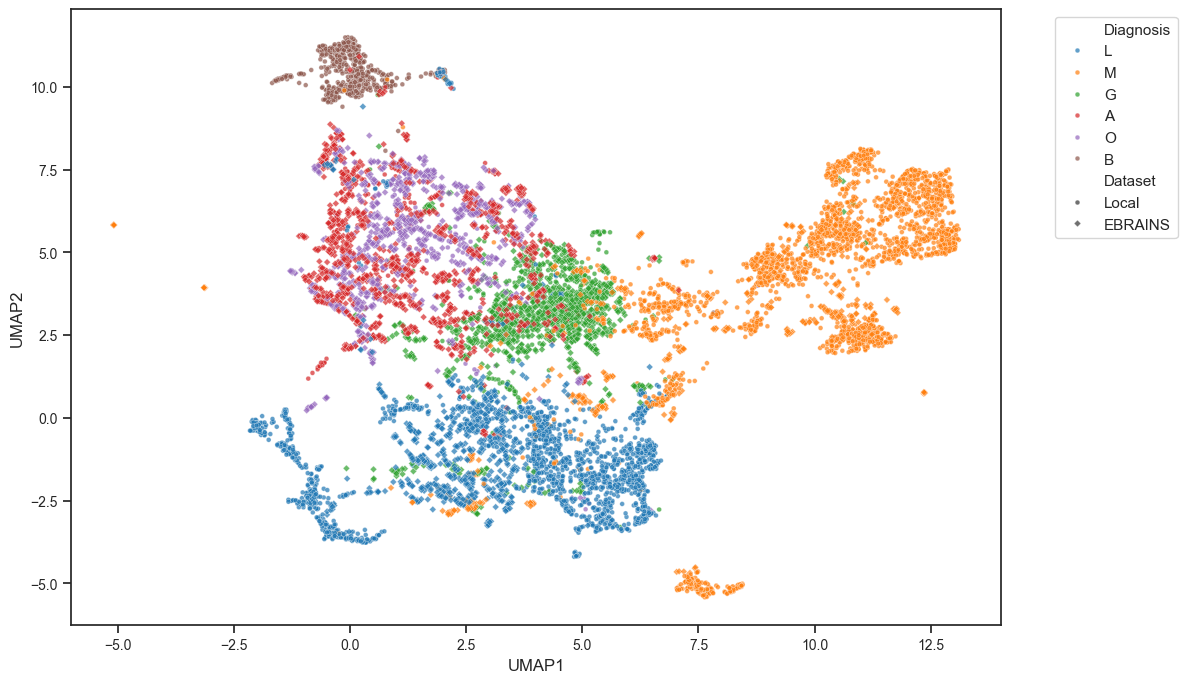

In [3]:
cluster(
    'out/compare/LMGAOB/fold5_0/unfrozen_baseline-vit_100/features_test.pt',
    'out/compare/LMGAOB/fold5_0/unfrozen_baseline-vit_100/features_ebrains.pt',
)

cv 60349
ebrains 8612
Start projection
Done projection


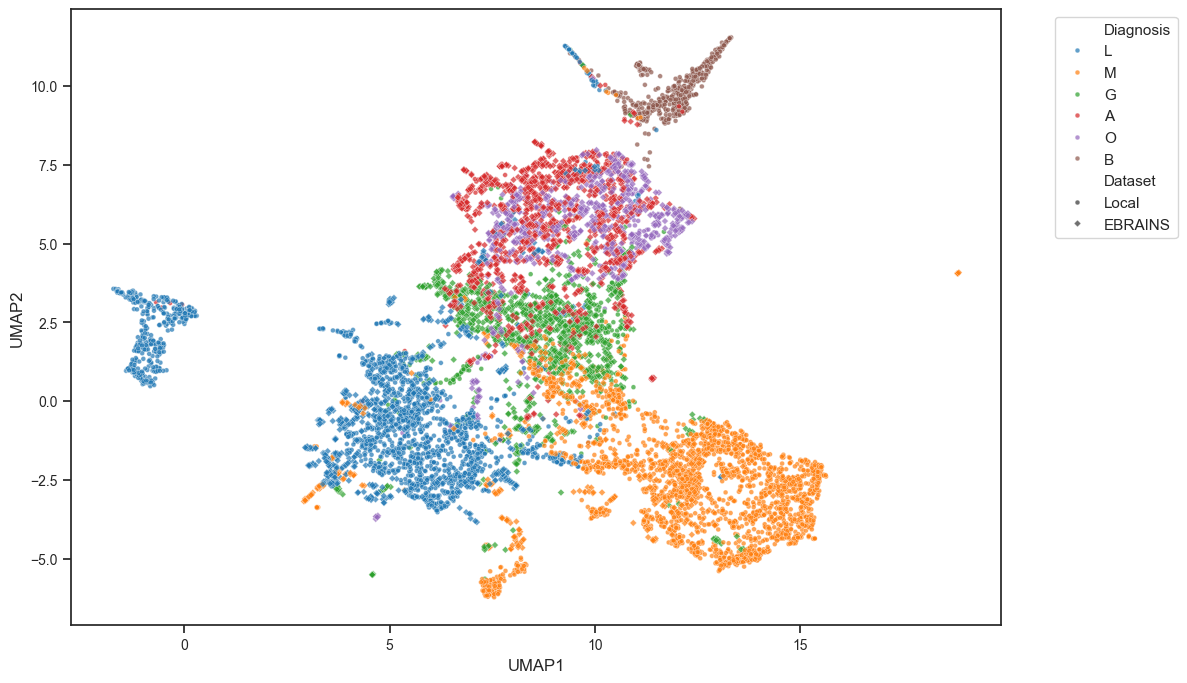

In [4]:
cluster(
    'out/compare/LMGAOB/fold5_0/unfrozen_baseline-cnn_100/features_test.pt',
    'out/compare/LMGAOB/fold5_0/unfrozen_baseline-cnn_100/features_ebrains.pt',
)